In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

medManipulados = pd.read_csv("https://raw.githubusercontent.com/manipulaeHealth/desafio-machine-learning/main/dados_preco.csv")

display (medManipulados)

display(medManipulados.info())

,descricao,criado,qtdInsumos,calculado,correto
0,30 CAP | BUPROPIONA CLORIDRATO 150MG,2020-08-05 23:19:09,1,47.5297,39.9
1,60 CAP | FINASTERIDA 1:10 1MG,2020-08-05 22:51:09,1,46.9620,43.6
2,60 CAP | NAC 250MG; SILIMARINA 150MG; SAME ...,2020-08-05 22:51:09,3,105.1390,111.4
3,60 CAP | ANASTROZOL 1:10 0.300MG,2020-08-05 22:51:09,1,49.0314,43.6
4,120 CAP | DUTASTERIDA 0.250MG; TADALAFIL 10MG,2020-08-05 22:49:09,2,161.8272,146.0
...,...,...,...,...,...
7116,45 CAP | SERTRALINA CLORIDRATO 40MG; SLENDEST...,2020-07-09 17:33:11,12,188.5325,181.8
7117,120 CAP | GREENSELECT 120MG,2020-07-09 17:24:09,1,377.6529,346.6
7118,60 CAP | MAGNESIO QUELADO 30% 220MG; SELENIO ...,2020-07-09 17:23:10,11,166.2868,157.2
7119,30 CAP | VALERIANA 50MG; PASSIFLORA 500MG; C...,2020-07-09 17:22:09,3,60.1646,68.1


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7121 entries, 0 to 7120
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   descricao   7121 non-null   object 
 1   criado      7121 non-null   object 
 2   qtdInsumos  7121 non-null   int64  
 3   calculado   7121 non-null   float64
 4   correto     7121 non-null   float64
dtypes: float64(2), int64(1), object(2)
memory usage: 278.3+ KB


None

In [30]:
#Organização do datasheet

auxList = []

for dados in medManipulados['descricao']:
    auxList.append(dados.split("|"))


separaNum = []
qtdInsumo = medManipulados['qtdInsumos']

for i in range(7121):
    auxSeNum = auxList[i][0].split(" ")
    del(auxSeNum[1:])
    separaNum.append(int(auxSeNum[0]))

#sorted(set(nomeInsumo))

medManipulados['diferenca'] = medManipulados['correto'] - medManipulados['calculado']
medManipulados['CAP'] = separaNum
display(medManipulados)


,descricao,criado,qtdInsumos,calculado,correto,diferenca,CAP
0,30 CAP | BUPROPIONA CLORIDRATO 150MG,2020-08-05 23:19:09,1,47.5297,39.9,-7.6297,30
1,60 CAP | FINASTERIDA 1:10 1MG,2020-08-05 22:51:09,1,46.9620,43.6,-3.3620,60
2,60 CAP | NAC 250MG; SILIMARINA 150MG; SAME ...,2020-08-05 22:51:09,3,105.1390,111.4,6.2610,60
3,60 CAP | ANASTROZOL 1:10 0.300MG,2020-08-05 22:51:09,1,49.0314,43.6,-5.4314,60
4,120 CAP | DUTASTERIDA 0.250MG; TADALAFIL 10MG,2020-08-05 22:49:09,2,161.8272,146.0,-15.8272,120
...,...,...,...,...,...,...,...
7116,45 CAP | SERTRALINA CLORIDRATO 40MG; SLENDEST...,2020-07-09 17:33:11,12,188.5325,181.8,-6.7325,45
7117,120 CAP | GREENSELECT 120MG,2020-07-09 17:24:09,1,377.6529,346.6,-31.0529,120
7118,60 CAP | MAGNESIO QUELADO 30% 220MG; SELENIO ...,2020-07-09 17:23:10,11,166.2868,157.2,-9.0868,60
7119,30 CAP | VALERIANA 50MG; PASSIFLORA 500MG; C...,2020-07-09 17:22:09,3,60.1646,68.1,7.9354,30


<function matplotlib.pyplot.show(close=None, block=None)>

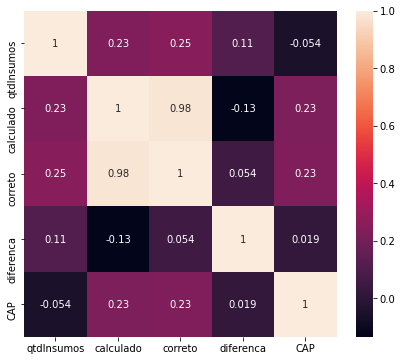

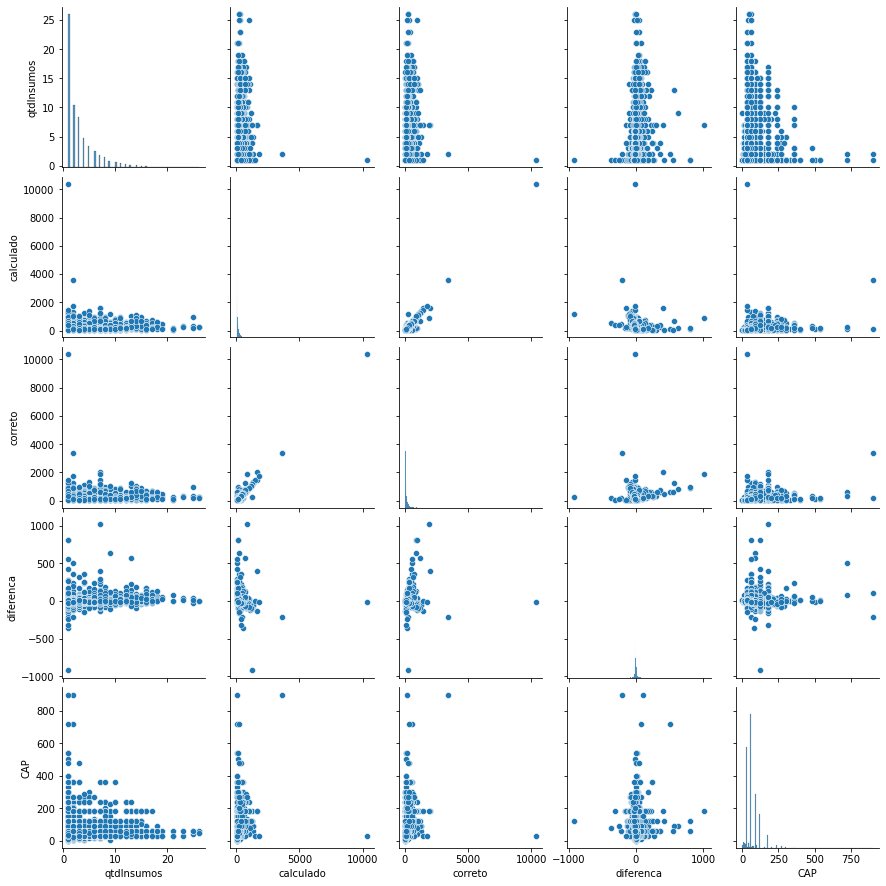

In [4]:
#Análise das correlações entre a variáveis

corr = medManipulados.drop(['descricao', 'criado'], axis=1)


plt.figure(figsize=(7,6))
sns.heatmap(corr.corr(), annot=True)
sns.pairplot(corr)
plt.show

In [24]:
#Organizando dados para fazer a previsão e treinando as regressões 

dadosTreino = pd.DataFrame(corr[0:3999])
medPrevisao= corr[4000:]

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import svm
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

y = dadosTreino['correto']
x = dadosTreino.drop(['correto'], axis=1)

x_treino, x_test, y_treino, y_test = train_test_split(x, y, train_size=0.6, random_state=2)

LinReg = LinearRegression()
ArvDesc = RandomForestRegressor()
MvsReg = svm.LinearSVR()

LinReg.fit(x_treino, y_treino)
ArvDesc.fit(x_treino, y_treino)
MvsReg.fit(x_treino, y_treino)


LinearSVR()

In [25]:
#Testes das regressões e amálise de desempenho

testLinReg = LinReg.predict(x_test)
testArvDesc = ArvDesc.predict(x_test)
testMvsReg = MvsReg.predict(x_test)

r2LinReg = metrics.r2_score(y_test, testLinReg)
r2ArvDesc = metrics.r2_score(y_test, testArvDesc)
r2MvsReg = metrics.r2_score(y_test, testMvsReg)

msqLinReg = metrics.mean_absolute_error(y_test, testLinReg)
msqArvDesc = metrics.mean_absolute_error(y_test, testArvDesc)
msqMvsReg = metrics.mean_absolute_error(y_test, testMvsReg)

print(f"R² Regressão Linear: {r2LinReg}\n Erro Regressão Linear: {msqLinReg}")
print(f"\n\nR² Arvore de Decisão: {r2ArvDesc} \nErro Arvore de Decisão: {msqArvDesc}")
print(f"\n\nR² Maquina Vetor de Suporte: {r2MvsReg} \nErro Maquina Vetor de Suporte: {msqMvsReg}")


R² Regressão Linear: 1.0
 Erro Regressão Linear: 7.180922523275512e-14


R² Arvore de Decisão: 0.968605551934876 
Erro Arvore de Decisão: 3.158710437499999


R² Maquina Vetor de Suporte: 0.9999999999990755 
Erro Maquina Vetor de Suporte: 7.509478048640438e-05


In [15]:
#Comparação dos valores alvos com os valores das regressões

comparacao = pd.DataFrame(y_test)
comparacao['Linear'] = testLinReg
comparacao['Arovore'] = testArvDesc
comparacao['SVM'] = testMvsReg
comparacao['calculado'] = medManipulados['calculado']

display(comparacao)


,correto,Linear,Arovore,SVM,calculado
3845,56.3,56.3,56.9050,56.300019,62.7624
848,43.6,43.6,44.1600,43.600021,50.5313
1658,217.8,217.8,216.6670,217.800040,227.4386
3414,40.0,40.0,39.9020,40.000029,30.5940
3677,39.9,39.9,39.9080,39.900045,32.9600
...,...,...,...,...,...
426,123.4,123.4,124.0240,123.400014,128.6441
1027,236.0,236.0,235.9900,236.000030,262.4979
2022,40.9,40.9,40.7200,40.900038,48.4313
2557,100.2,100.2,100.7985,100.200030,109.4748


In [49]:
#Calculos prever dados finais

difMed = dadosTreino['diferenca'].mean()

medPrevisao['diferenca'] = difMed

previsao = medPrevisao.drop(['correto'], axis=1)

prevMedicamentos = ArvDesc.predict(previsao)

finalComparacao = pd.DataFrame(medPrevisao['correto'])
finalComparacao['Valor previsto'] = prevMedicamentos
finalComparacao['Calculado( do datasheet)'] = medManipulados['calculado']

score = metrics.r2_score(medPrevisao['correto'], prevMedicamentos)
erro = metrics.mean_absolute_error(medPrevisao['correto'], prevMedicamentos)

print(f"Score previsão: {score}\n Erro da previsão: {erro}")

display(finalComparacao)

Score previsão: 0.8964848377764674
 Erro da previsão: 12.70332870874721


<ipython-input-49-c71089bf8814>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  medPrevisao['diferenca'] = difMed


,correto,Valor previsto,Calculado( do datasheet)
4000,39.9,61.1470,62.7600
4001,40.0,39.9320,33.5520
4002,40.0,43.1460,45.7949
4003,49.9,49.7333,37.3110
4004,57.3,61.6920,63.0856
...,...,...,...
7116,181.8,185.9360,188.5325
7117,346.6,360.9030,377.6529
7118,157.2,163.3680,166.2868
7119,68.1,58.1310,60.1646
